
<span style="color:pink; font-size:40px;">Part 1:Data manipulation</span>

## import package

In [2]:
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [3]:
df_feature=pd.read_csv("/Users/annie/Desktop/DATA 1030/Project_AnniHu/1030project_AnniHu/features.csv")
df_stores=pd.read_csv("/Users/annie/Desktop/DATA 1030/Project_AnniHu/1030project_AnniHu/stores.csv")
df_train=pd.read_csv("/Users/annie/Desktop/DATA 1030/Project_AnniHu/1030project_AnniHu/train.csv")
df_test=pd.read_csv("/Users/annie/Desktop/DATA 1030/Project_AnniHu/1030project_AnniHu/test.csv")


### check duplicate value

In [51]:
df_feature.duplicated(subset=['Store', 'Date', 'IsHoliday']).sum()

np.int64(0)

### exploring feature.csv

In [41]:
print("Shape of this dataset:",df_feature.shape)

Shape of this dataset: (8190, 12)


In [42]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
#column names
print(df_feature.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [44]:
#summary infromation about feature.csv
print(df_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [15]:
# stistical summary about numerical features in feature.csv
print(df_feature.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [16]:
# stistical summary about categorical features in feature.csv
print(df_feature.describe(include='object'))

              Date
count         8190
unique         182
top     2010-02-05
freq            45


In [63]:
# check missing value
print(df_feature.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [4]:
# Number of rows (data points) that contain at least one missing value
num_rows_with_missing = df_feature.isnull().any(axis=1).sum()

# Fraction of rows (data points) with missing values
frac_rows_with_missing = num_rows_with_missing / len(df_feature)

# Number of features (columns) that contain missing values
num_features_with_missing = df_feature.isnull().any().sum()

# Fraction of features with missing values
frac_features_with_missing = num_features_with_missing / df_feature.shape[1]

print(f"Fraction of data points with missing values: {frac_rows_with_missing:.2%}")
print(f"Fraction of features with missing values: {frac_features_with_missing:.2%}")


Fraction of data points with missing values: 74.74%
Fraction of features with missing values: 58.33%


In [18]:
# number of unique value
df_feature.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

### exploring train and stores dataset

In [19]:
# shape of stores datset
print(df_stores.shape)

(45, 3)


In [20]:
# shape of train dataset
print(df_train.shape)

(421570, 5)


In [21]:
# check missing value in stores
print(df_stores.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [22]:
# check missing value in train dataset
print(df_train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


## Fill the missing value
- fill missing value in markdown1-5 with 0
- fill CPI
- fill unemplyment

MarkDown 1-5
- Since this is promotional markdown in Walmart, so missing value means the stores do not have promition
- fill missing valye with 0

In [88]:

cols=[f'MarkDown{i}' for i in range(1,6)]
df_feature[cols]=df_feature[cols].fillna(0)
print(df_feature.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


### CPI:The consumer price index. It measures the monthly changes in prices paid by US consumers
- fill NA values with median

In [89]:
df_feature['CPI'].fillna(df_feature['CPI'].median(),inplace=True)
print(df_feature.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


/var/folders/b8/fhp9htdj3z3gc6rkrbc_rs8r0000gn/T/ipykernel_54173/3647993844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feature['CPI'].fillna(df_feature['CPI'].median(),inplace=True)


### Unemployment
- fill missing values with median

In [90]:
df_feature['Unemployment'].fillna(df_feature['Unemployment'].median(),inplace=True)
print(df_feature.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


/var/folders/b8/fhp9htdj3z3gc6rkrbc_rs8r0000gn/T/ipykernel_54173/1414582726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feature['Unemployment'].fillna(df_feature['Unemployment'].median(),inplace=True)


## Merge dataset to get final train/val dataset

In [91]:
df_final=df_train.merge(df_stores,how='left',on='Store').merge(df_feature,how='left',on=['Store','Date','IsHoliday'])


In [92]:
print(df_final.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [93]:
print(df_final.isnull().sum())



Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [94]:
# sort data by Store, Dept,Date(ASC)
df_final = df_final.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)


In [95]:
print(df_final.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.548        0.0        0.0        0.0        0.0        0.0   
2       2.514        0.0        0.0        0.0        0.0        0.0   
3       2.561        0.0        0.0        0.0        0.0        0.0   
4       2.625        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170       

## Merge dataset to get final test dataset

In [96]:
df_final_test=df_test.merge(df_stores,how='left',on='Store').merge(df_feature,how='left',on=['Store','Date','IsHoliday'])

In [97]:
print(df_final_test.shape)

(115064, 15)


In [98]:
print(df_test.shape)

(115064, 4)


In [99]:
print(df_final_test.isnull().sum())

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


<span style="color:pink; font-size:40px;">Part 2:EDA</span>

## Need to do next step:
- log transformation on weekly sales


### Distribution of weekly_sales(traget variable)

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


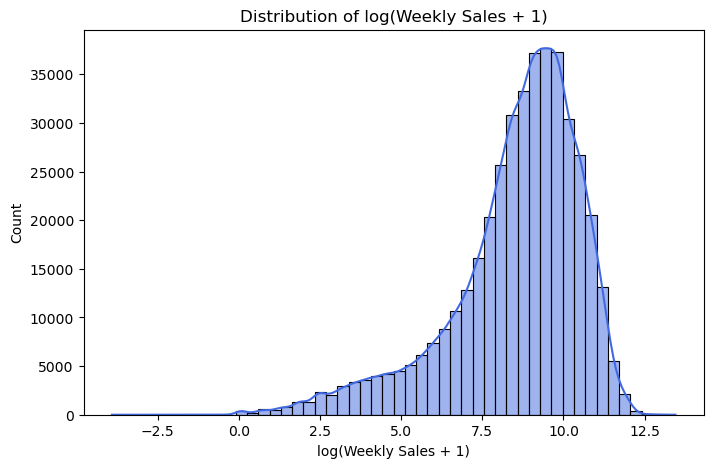

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_final['Weekly_Sales']), bins=50, kde=True, color='royalblue')
plt.title('Distribution of log(Weekly Sales + 1)')
plt.xlabel('log(Weekly Sales + 1)')
plt.ylabel('Count')
plt.show()


<span style="color:red">This plot shows that the original distribution of Weekly Sales was highly right-skewed, so I applied a log transformation, which made it approximately bell-shaped.</span>

### Weekly sales Over Time

Text(0.5, 1.0, 'Total Weekly Sales Over Time')

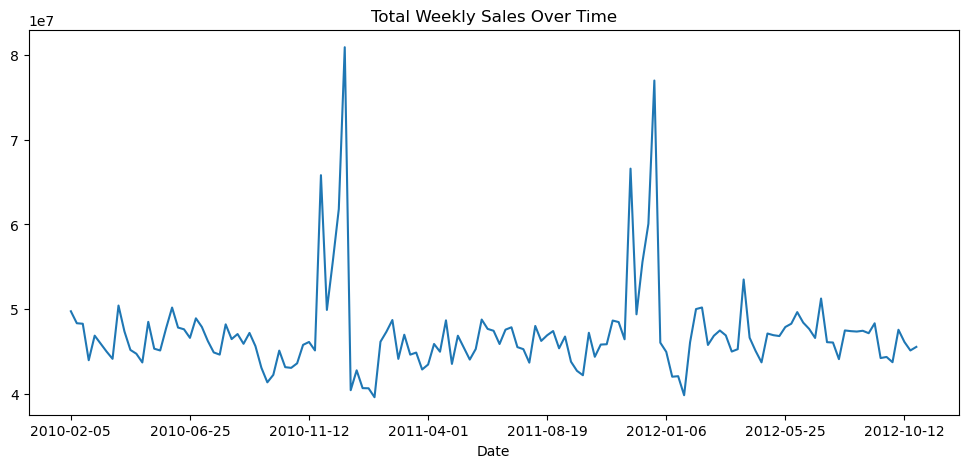

In [28]:
df_final.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,5))
plt.title('Total Weekly Sales Over Time')

### Count holiday for each month

In [29]:

df_final['Date'] = pd.to_datetime(df_final['Date'])


df_final['Month'] = df_final['Date'].dt.month


holiday_counts = df_final[df_final['IsHoliday'] == True]['Month'].value_counts().sort_index()
print(holiday_counts)


Month
2     8895
9     8861
11    5959
12    5946
Name: count, dtype: int64


<span style="color:red">We can see that sales are noticeably higher during holiday weeks, especially around Christmas.</span>

### weekly sale VS. IsHoliday

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/b8/fhp9htdj3z3gc6rkrbc_rs8r0000gn/T/ipykernel_54173/1790467742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


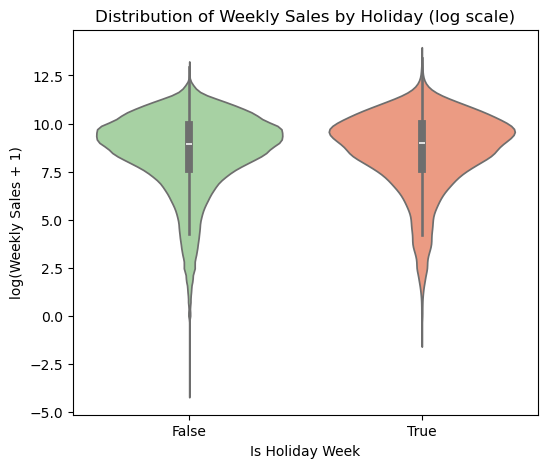

In [30]:
plt.figure(figsize=(6,5))
sns.violinplot(
    data=df_final,
    x='IsHoliday',
    y=np.log1p(df_final['Weekly_Sales']),
    inner='box',
    palette=['#A1D99B', '#FC9272']
)
plt.title('Distribution of Weekly Sales by Holiday (log scale)', fontsize=12)
plt.xlabel('Is Holiday Week')
plt.ylabel('log(Weekly Sales + 1)')
plt.show()


<span style="color:red">Holiday weeks generally show higher overall sales, with greater variability across stores and departments — some see significant spikes in sales.</span>
- This variability may related to markdown1-5

### Temperature VS. weekly_sale

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Temperature vs log(Weekly Sales)')

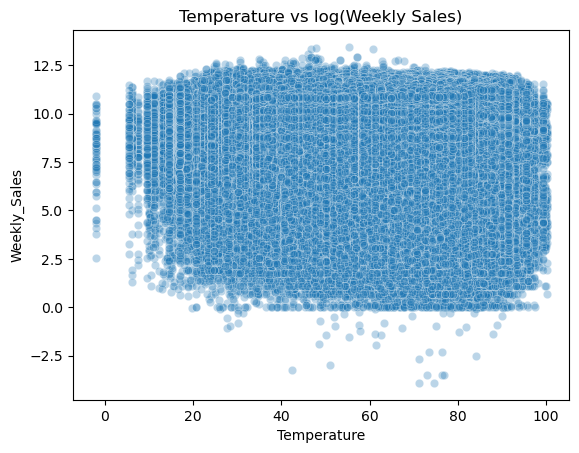

In [31]:
sns.scatterplot(data=df_final, x='Temperature', y=np.log1p(df_final['Weekly_Sales']), alpha=0.3)
plt.title('Temperature vs log(Weekly Sales)')


<span style="color:red">The overall impact of temperature on sales appears weak or non-linear, with slightly lower sales observed during cold periods (below 20°F).</span>


### Fuel_Price VS. Weekly_Sales

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Fuel Price vs log(Weekly Sales)')

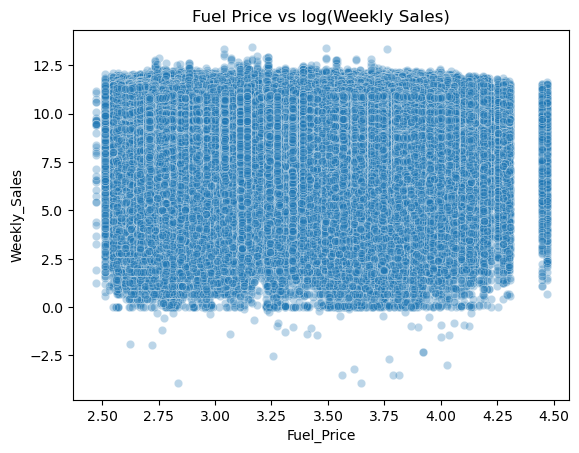

In [32]:
sns.scatterplot(data=df_final, x='Fuel_Price', y=np.log1p(df_final['Weekly_Sales']), alpha=0.3)
plt.title('Fuel Price vs log(Weekly Sales)')


### Store level mean sales

Text(0.5, 1.0, 'Average Weekly Sales by Store')

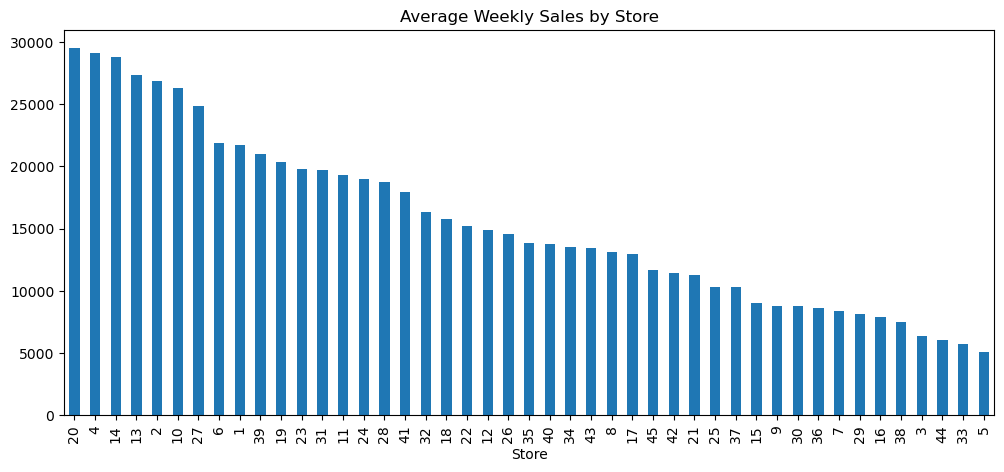

In [33]:
store_sales = df_final.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
store_sales.plot(kind='bar', figsize=(12,5))
plt.title('Average Weekly Sales by Store')


### Store type and size VS. Weekly_Sales

/var/folders/b8/fhp9htdj3z3gc6rkrbc_rs8r0000gn/T/ipykernel_54173/621600428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Type', y='Size', palette=['#A1D99B', '#9ECAE1', '#FC9272'])


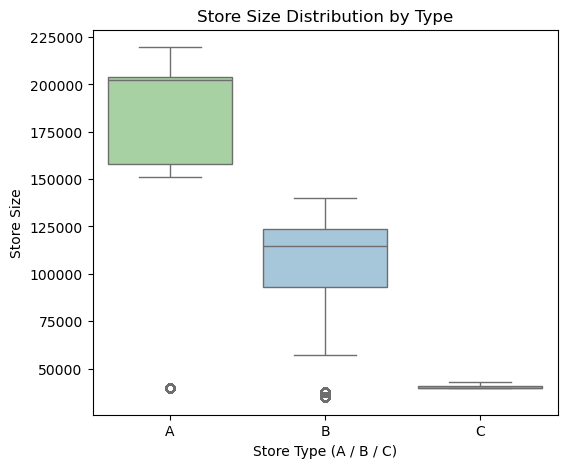

In [34]:
# Type vs. Size
plt.figure(figsize=(6,5))
sns.boxplot(data=df_final, x='Type', y='Size', palette=['#A1D99B', '#9ECAE1', '#FC9272'])
plt.title('Store Size Distribution by Type')
plt.xlabel('Store Type (A / B / C)')
plt.ylabel('Store Size')
plt.show()


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/b8/fhp9htdj3z3gc6rkrbc_rs8r0000gn/T/ipykernel_54173/1076043994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


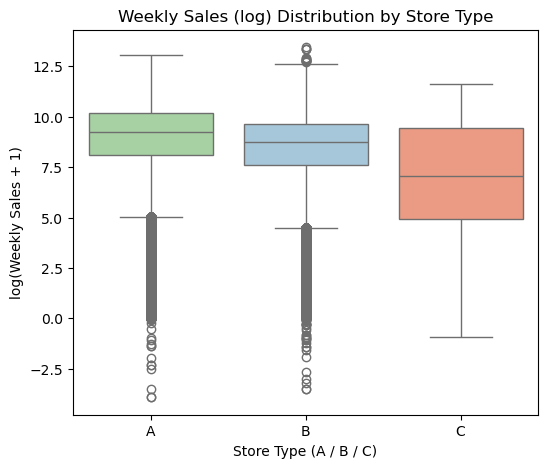

In [35]:
#Type vs Weeky _Sale
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df_final,
    x='Type',
    y=np.log1p(df_final['Weekly_Sales']),
    palette=['#A1D99B', '#9ECAE1', '#FC9272']
)
plt.title('Weekly Sales (log) Distribution by Store Type')
plt.xlabel('Store Type (A / B / C)')
plt.ylabel('log(Weekly Sales + 1)')
plt.show()


### Dept level analysis 

Text(0.5, 1.0, 'Top 10 Departments by Average Weekly Sales')

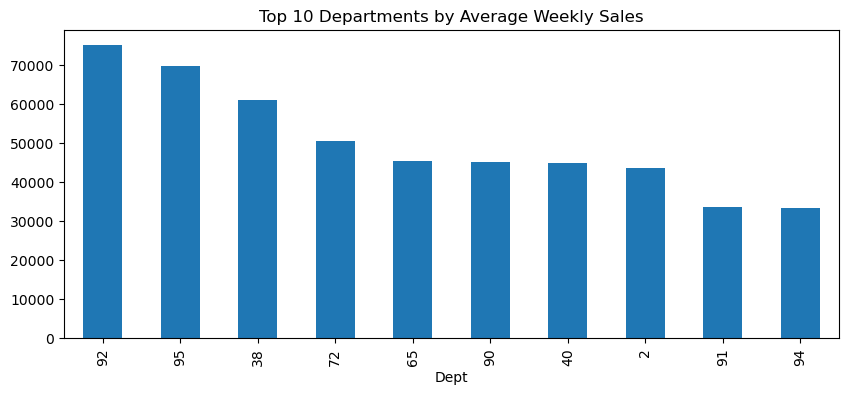

In [36]:
dept_sales = df_final.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Departments by Average Weekly Sales')

### feature correlation

Text(0.5, 1.0, 'Correlation Heatmap')

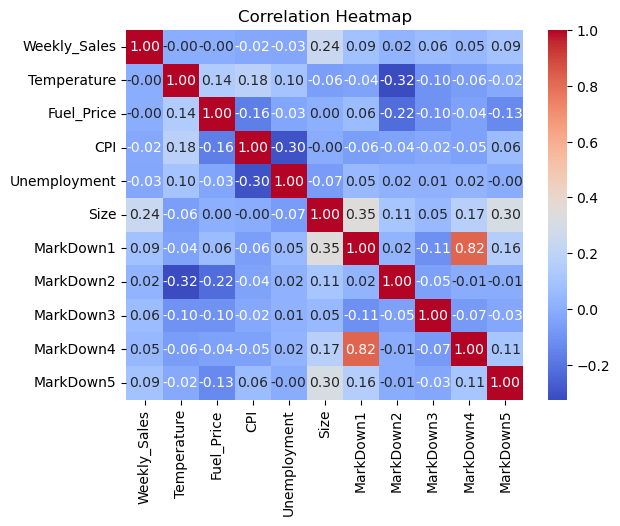

In [37]:
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Size','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5']
sns.heatmap(df_final[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')


<span style="color:red">No clear linear relationship between features</span>


## Log transformation for target variable(weekly_sale)

In [76]:
df_final['Weekly_Sales']=np.log1p(df_final['Weekly_Sales'])


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<span style="color:pink; font-size:40px;">Part 3:Split Data</span>


## Basic Time Series

Train: 2010/2-2011/12

val:2012/2-2012/10- without holiday

test: 2012/12- 2013

In [104]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [105]:
df_final['Date'] = pd.to_datetime(df_final['Date'])


In [106]:
df_final = df_final.sort_values('Date')


In [108]:
X=df_final.drop(columns=['Weekly_Sales'])
y=df_final['Weekly_Sales']

In [113]:
outer_split = TimeSeriesSplit(n_splits=3)
split_indices = []  

for i, (train_idx, other_idx) in enumerate(outer_split.split(X)):
    print(f"\n===== Outer Fold {i+1} =====")
    print(f"Train: {df_final.iloc[train_idx]['Date'].min()} → {df_final.iloc[train_idx]['Date'].max()}")
    print(f"Other: {df_final.iloc[other_idx]['Date'].min()} → {df_final.iloc[other_idx]['Date'].max()}")

    X_other, y_other = X.iloc[other_idx], y.iloc[other_idx]
    inner_split = TimeSeriesSplit(n_splits=3)

    for j, (val_idx, test_idx) in enumerate(inner_split.split(X_other)):
        print(f"  Inner Fold {j+1}:")
        print(f"  Val:  {df_final.iloc[other_idx[val_idx]]['Date'].min()} → {df_final.iloc[other_idx[val_idx]]['Date'].max()}")
        print(f"  Test: {df_final.iloc[other_idx[test_idx]]['Date'].min()} → {df_final.iloc[other_idx[test_idx]]['Date'].max()}")
        print("  " + "-"*40)

        # save index
        split_indices.append({
            'outer_fold': i + 1,
            'inner_fold': j + 1,
            'train_idx': train_idx,
            'val_idx': other_idx[val_idx],
            'test_idx': other_idx[test_idx]
        })


===== Outer Fold 1 =====
Train: 2010-02-05 00:00:00 → 2010-10-08 00:00:00
Other: 2010-10-08 00:00:00 → 2011-06-17 00:00:00
  Inner Fold 1:
  Val:  2010-10-08 00:00:00 → 2010-12-10 00:00:00
  Test: 2010-12-10 00:00:00 → 2011-02-11 00:00:00
  ----------------------------------------
  Inner Fold 2:
  Val:  2010-10-08 00:00:00 → 2011-02-11 00:00:00
  Test: 2011-02-11 00:00:00 → 2011-04-15 00:00:00
  ----------------------------------------
  Inner Fold 3:
  Val:  2010-10-08 00:00:00 → 2011-04-15 00:00:00
  Test: 2011-04-15 00:00:00 → 2011-06-17 00:00:00
  ----------------------------------------

===== Outer Fold 2 =====
Train: 2010-02-05 00:00:00 → 2011-06-17 00:00:00
Other: 2011-06-17 00:00:00 → 2012-02-24 00:00:00
  Inner Fold 1:
  Val:  2011-06-17 00:00:00 → 2011-08-19 00:00:00
  Test: 2011-08-19 00:00:00 → 2011-10-21 00:00:00
  ----------------------------------------
  Inner Fold 2:
  Val:  2011-06-17 00:00:00 → 2011-10-21 00:00:00
  Test: 2011-10-21 00:00:00 → 2011-12-23 00:00:00


<span style="color:pink; font-size:40px;">Part 3:Data preprocessing</span>


In [110]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler



In [115]:
# Data preprocessing Pipeline

onehot_ftrs = ['Store', 'Dept', 'Type', 'IsHoliday']
minmax_ftrs=['Temperature', 'Fuel_Price','Size']
std_ftrs=['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5','CPI', 'Unemployment']
preprocessor= ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax',MinMaxScaler(),minmax_ftrs),
        ('std',StandardScaler(),std_ftrs)
    ]
)
clf=Pipeline(steps=[('preprocessor',preprocessor)])



In [117]:


processed_data = []
for fold in split_indices:
    print(f"\n Processing: Outer {fold['outer_fold']} | Inner {fold['inner_fold']}")
    
    
    train_idx, val_idx, test_idx = fold['train_idx'], fold['val_idx'], fold['test_idx']

    X_train, X_val, X_test = (
        X.iloc[train_idx],
        X.iloc[val_idx],
        X.iloc[test_idx]
    )
    y_train, y_val, y_test = (
        y.iloc[train_idx],
        y.iloc[val_idx],
        y.iloc[test_idx]
    )

    #  fit-transform
    
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep   = clf.transform(X_val)
    X_test_prep  = clf.transform(X_test)

    print(f"  Train shape: {X_train_prep.shape}, Val: {X_val_prep.shape}, Test: {X_test_prep.shape}")

    processed_data.append({
        'outer_fold': fold['outer_fold'],
        'inner_fold': fold['inner_fold'],
        'X_train': X_train_prep,
        'X_val': X_val_prep,
        'X_test': X_test_prep,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    })



 Processing: Outer 1 | Inner 1
  Train shape: (105394, 141), Val: (26348, 141), Test: (26348, 141)

 Processing: Outer 1 | Inner 2
  Train shape: (105394, 141), Val: (52696, 141), Test: (26348, 141)

 Processing: Outer 1 | Inner 3
  Train shape: (105394, 141), Val: (79044, 141), Test: (26348, 141)

 Processing: Outer 2 | Inner 1
  Train shape: (210786, 141), Val: (26348, 141), Test: (26348, 141)

 Processing: Outer 2 | Inner 2
  Train shape: (210786, 141), Val: (52696, 141), Test: (26348, 141)

 Processing: Outer 2 | Inner 3
  Train shape: (210786, 141), Val: (79044, 141), Test: (26348, 141)

 Processing: Outer 3 | Inner 1
  Train shape: (316178, 141), Val: (26348, 141), Test: (26348, 141)

 Processing: Outer 3 | Inner 2
  Train shape: (316178, 141), Val: (52696, 141), Test: (26348, 141)

 Processing: Outer 3 | Inner 3
  Train shape: (316178, 141), Val: (79044, 141), Test: (26348, 141)
